<a href="https://colab.research.google.com/github/MJAHMADEE/Machine-Learning-and-Fault-Detection/blob/main/TSNE_%26_AutoEncoder_%26_MLP_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Dataset

## Example 1

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Extract features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Print the number of features and classes
num_features = X.shape[1]
num_classes = len(y.unique())

print("Number of features:", num_features)
print("Number of classes:", num_classes)


Number of features: 784
Number of classes: 10


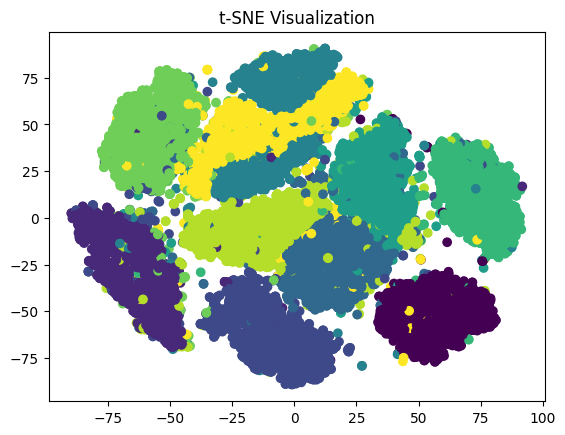

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title("t-SNE Visualization")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, y)
print("Silhouette Score:", silhouette)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, y)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, y)
print("Davies-Bouldin Index:", davies_bouldin)


Silhouette Score: 0.043404133310843605
Calinski-Harabasz Index: 584.8204458970243
Davies-Bouldin Index: 3.9622473518624757


Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 7225.5015
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.6846
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.3530
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.3242
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.3301
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.3174
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.2964
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.3003
Epoch 9/10
625/625 [==============================] - 2s 3ms/step - loss: 7224.2842
Epoch 10/10
625/625 [==============================] - 1s 2ms/step


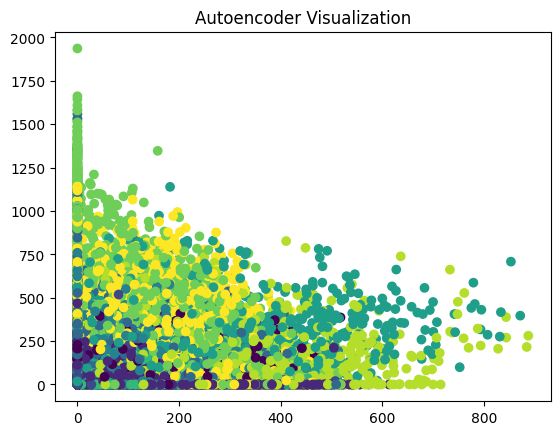

In [ ]:
from tensorflow.keras import layers, models

# Define the autoencoder model
input_dim = X.shape[1]
encoding_dim = 32

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=10, batch_size=32, verbose=1)

from tensorflow.keras import models

# Define the encoder model
encoder_model = models.Model(inputs=input_layer, outputs=encoder)

# Encode the data
X_encoded = encoder_model.predict(X)

# Visualize the encoded data
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y)
plt.title("Autoencoder Visualization")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Before t-SNE:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       377
           1       0.95      0.97      0.96       436
           2       0.86      0.88      0.87       390
           3       0.87      0.89      0.88       406
           4       0.89      0.91      0.90       401
           5       0.83      0.84      0.84       341
           6       0.94      0.92      0.93       412
           7       0.92      0.92      0.92       438
           8       0.86      0.80      0.83       384
           9       0.87      0.87      0.87       415

    accuracy                           0.90      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.90      0.90      0.90      4000

Execution Time: 10.736526250839233

Classification After t-SNE:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       377
           1       0.93      0.96      

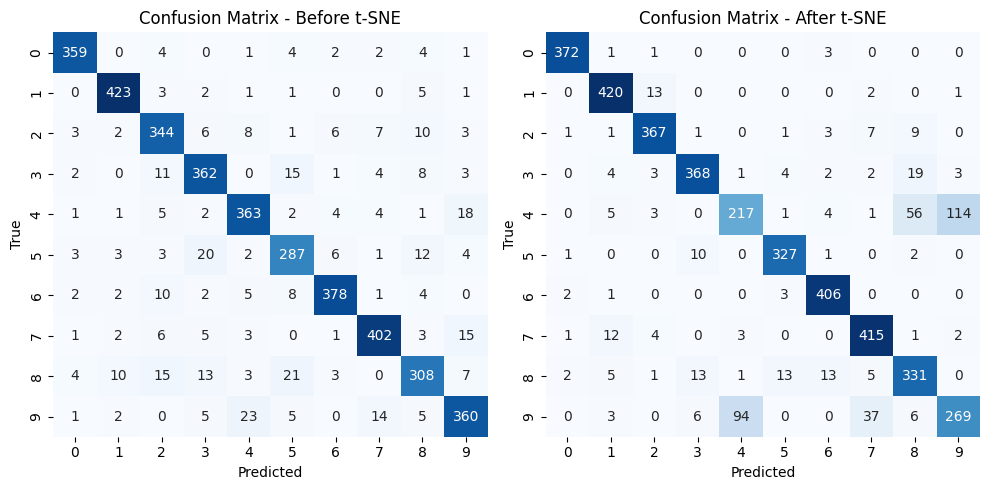

In [ ]:
from sklearn.model_selection import train_test_split

# Classification before t-SNE
X_train_before, X_test_before, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier_before = LogisticRegression()
start_time = time.time()
classifier_before.fit(X_train_before, y_train)
end_time = time.time()
execution_time_before = end_time - start_time

y_pred_before = classifier_before.predict(X_test_before)
classification_report_before = classification_report(y_test, y_pred_before)
confusion_matrix_before = confusion_matrix(y_test, y_pred_before)

# Classification after t-SNE
X_train_after, X_test_after, _, _ = train_test_split(X_tsne, y, test_size=0.2, random_state=42)
classifier_after = LogisticRegression()
start_time = time.time()
classifier_after.fit(X_train_after, y_train)
end_time = time.time()
execution_time_after = end_time - start_time

y_pred_after = classifier_after.predict(X_test_after)
classification_report_after = classification_report(y_test, y_pred_after)
confusion_matrix_after = confusion_matrix(y_test, y_pred_after)

# Print classification results and execution time
print("Classification Before t-SNE:")
print(classification_report_before)
print("Execution Time:", execution_time_before)

print("\nClassification After t-SNE:")
print(classification_report_after)
print("Execution Time:", execution_time_after)

# Plot confusion matrices
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_before, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Before t-SNE")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_after, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - After t-SNE")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


## Example 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    random_state=42
)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Class'] = y

# Save DataFrame to CSV
df.to_csv('data.csv', index=False)

## Method 2 ##
# import pandas as pd
# import numpy as np

# # Set random seed for reproducibility
# np.random.seed(42)

# # Generate synthetic data
# n_samples = 1000
# n_features = 4
# n_classes = 3

# data = np.random.randn(n_samples, n_features)
# labels = np.random.randint(0, n_classes, size=n_samples)

# # Create a DataFrame from the data and labels
# df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(n_features)])
# df['Label'] = labels

# # Save the DataFrame as a CSV file
# df.to_csv('data.csv', index=False)

## Method 3 ##
# import pandas as pd

# # Load CSV data
# data = pd.read_csv('path_to_your_csv_file.csv')

# # Print number of features and classes
# num_features = data.shape[1] - 1  # Subtract 1 for the target column
# num_classes = len(data['target'].unique())  # Assuming the target column name is 'target'

# print("Number of features:", num_features)
# print("Number of classes:", num_classes)


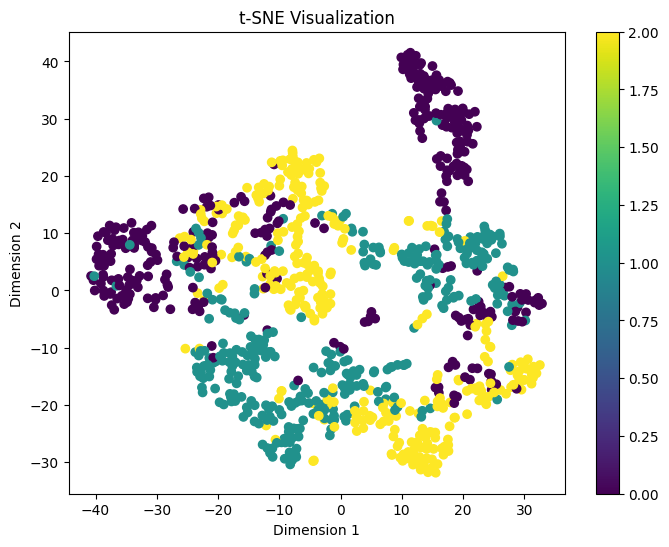

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data from CSV
df = pd.read_csv('data.csv')

# Extract features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()


32/32 [==============================] - 0s 7ms/step


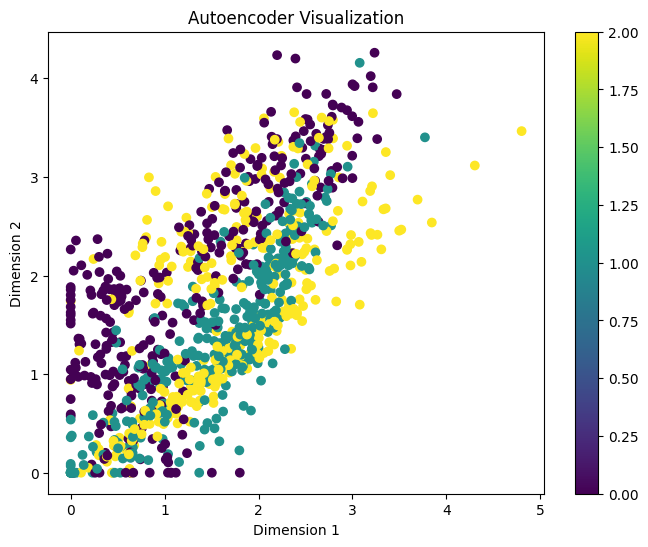

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers

# Load data from CSV
df = pd.read_csv('data.csv')

# Extract features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder model
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='linear')(encoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

# Compile and train the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

# Encode the data
encoder_model = tf.keras.Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X_scaled)

# Visualize encoded data
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
plt.title('Autoencoder Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Load data from CSV
df = pd.read_csv('data.csv')

# Extract features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification without dimensionality reduction
start_time = time.time()
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
end_time = time.time()

# Evaluate classification performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification without dimensionality reduction:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("Execution Time:", end_time - start_time)

# Classification after t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

classifier_tsne = LogisticRegression()
classifier_tsne.fit(X_train_tsne, y_train_tsne)
end_time = time.time()

y_pred_tsne = classifier_tsne.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test_tsne, y_pred_tsne)
classification_rep_tsne = classification_report(y_test_tsne, y_pred_tsne)
confusion_mat_tsne = confusion_matrix(y_test_tsne, y_pred_tsne)

print("\nClassification after t-SNE:")
print("Accuracy:", accuracy_tsne)
print("Classification Report:\n", classification_rep_tsne)
print("Confusion Matrix:\n", confusion_mat_tsne)
print("Execution Time:", end_time - start_time)

# Classification after Autoencoder
start_time = time.time()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=encoder)
X_encoded = autoencoder.predict(X_scaled)
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

classifier_auto = LogisticRegression()
classifier_auto.fit(X_train_auto, y_train_auto)
end_time = time.time()

y_pred_auto = classifier_auto.predict(X_test_auto)
accuracy_auto = accuracy_score(y_test_auto, y_pred_auto)
classification_rep_auto = classification_report(y_test_auto, y_pred_auto)
confusion_mat_auto = confusion_matrix(y_test_auto, y_pred_auto)

print("\nClassification after Autoencoder:")
print("Accuracy:", accuracy_auto)
print("Classification Report:\n", classification_rep_auto)
print("Confusion Matrix:\n", confusion_mat_auto)
print("Execution Time:", end_time - start_time)


Classification without dimensionality reduction:
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        55
           1       0.65      0.64      0.64        72
           2       0.55      0.53      0.54        73

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.62      0.62      0.62       200

Confusion Matrix:
 [[40  7  8]
 [ 2 46 24]
 [16 18 39]]
Execution Time: 0.01971912384033203

Classification after t-SNE:
Accuracy: 0.465
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.73      0.55        55
           1       0.62      0.56      0.58        72
           2       0.30      0.18      0.22        73

    accuracy                           0.47       200
   macro avg       0.45      0.49      0.45       200
weighted avg       0.45      0.47      0.44

# iris Dataset

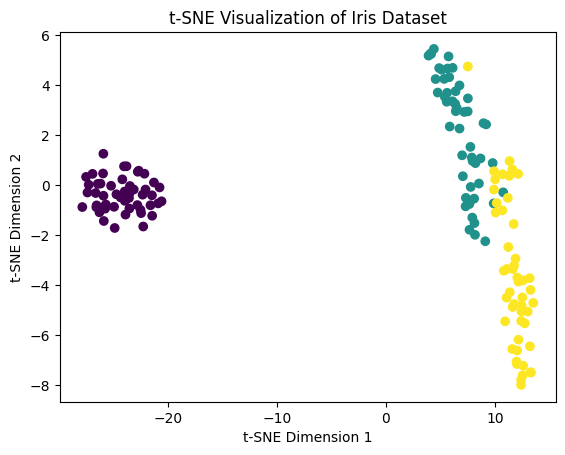

Silhouette Score: 0.5034774406932961
Calinski-Harabasz Score: 487.33087637489984
Davies-Bouldin Score: 0.7513707094756737


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Perform t-SNE on the dataset
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Iris Dataset')
plt.show()

# Calculate evaluation indices
silhouette = silhouette_score(X, y)
calinski_harabasz = calinski_harabasz_score(X, y)
davies_bouldin = davies_bouldin_score(X, y)
# میتوانید در مورد معیارهای زیر جستجو کنید
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


Epoch 1/2000
8/8 [==============================] - 2s 3ms/step - loss: 1.3389
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 1.3283
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 1.3184
Epoch 4/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.3091
Epoch 5/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2993
Epoch 6/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2888
Epoch 7/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2802
Epoch 8/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2701
Epoch 9/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2600
Epoch 10/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2502
Epoch 11/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2405
Epoch 12/2000
8/8 [==============================] - 0s 2ms/step - loss: 1.2305
Epoch 13/2000
8/8 [==============================

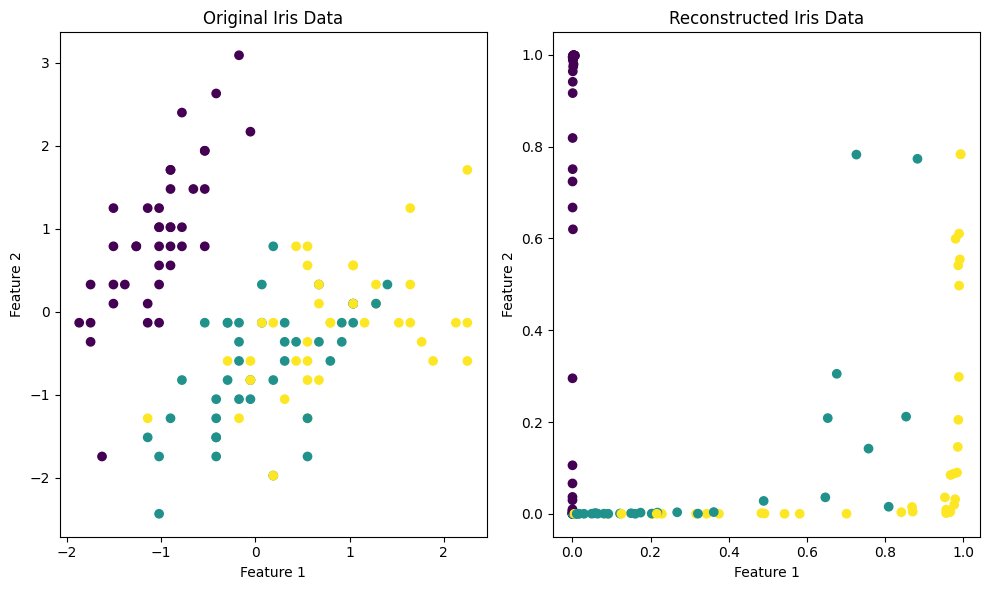

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2

input_layer = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

# Compile and train the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=2000, batch_size=16, verbose=1)

# Calculate the reconstruction loss
X_train_pred = autoencoder.predict(X_train)
reconstruction_loss = np.mean(np.square(X_train_pred - X_train))

print("Reconstruction Loss: ", reconstruction_loss)

# Visualize the original and reconstructed data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Original Iris Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_train_pred[:, 0], X_train_pred[:, 1], c=y_train)
plt.title("Reconstructed Iris Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


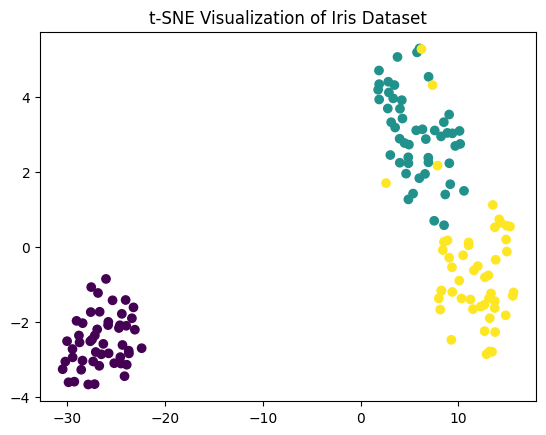

1/1 [==============================] - 0s 96ms/step
Mean Squared Error (MSE) for Reconstruction:
Sample 1: 0.1328
Sample 2: 0.0659
Sample 3: 0.2197
Sample 4: 0.0629
Sample 5: 0.1131
Sample 6: 0.1347
Sample 7: 0.0546
Sample 8: 0.0522
Sample 9: 0.1050
Sample 10: 0.1175
Sample 11: 0.1609
Sample 12: 0.2331
Sample 13: 0.1111
Sample 14: 0.0542
Sample 15: 0.0784
Sample 16: 0.2043
Sample 17: 0.1169
Sample 18: 0.0802
Sample 19: 0.0478
Sample 20: 0.1093
Sample 21: 0.1271
Sample 22: 0.1134
Sample 23: 0.0706
Sample 24: 0.1376
Sample 25: 0.1382
Sample 26: 0.1070
Sample 27: 0.0800
Sample 28: 0.0811
Sample 29: 0.0999
Sample 30: 0.0584


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the feature vectors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE on the scaled data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE embeddings
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE Visualization of Iris Dataset')
plt.show()

# Split the data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the autoencoder model
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(4,)))
model.add(Dense(4, activation='linear'))

# Compile and train the autoencoder
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=0)

# Generate reconstructions for test set
X_reconstructed = model.predict(X_test)

# Calculate the mean squared error (reconstruction loss)
mse = np.mean(np.power(X_test - X_reconstructed, 2), axis=1)

# Print the reconstruction index
print("Mean Squared Error (MSE) for Reconstruction:")
for i, mse_value in enumerate(mse):
    print(f"Sample {i+1}: {mse_value:.4f}")


# Multi-Layer Perceptron (MLP) model with k-fold cross-validation

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")

# Generate some sample data
X = np.random.rand(100, 5)  # 100 samples with 5 features
y = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Store the accuracy scores for each fold
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the MLP classifier on the training data
    mlp.fit(X_train, y_train)

    # Evaluate the model on the test data
    score = mlp.score(X_test, y_test)
    scores.append(score)

# Compute the average accuracy and standard deviation
avg_accuracy = np.mean(scores)
std_dev = np.std(scores)

print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


Average Accuracy: 0.59
Standard Deviation: 0.13


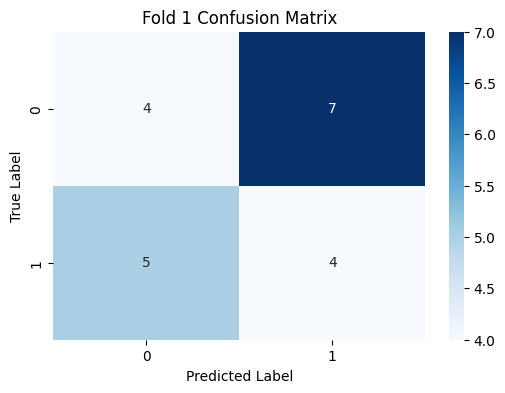

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.36      0.44      0.40         9

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.41      0.40      0.40        20



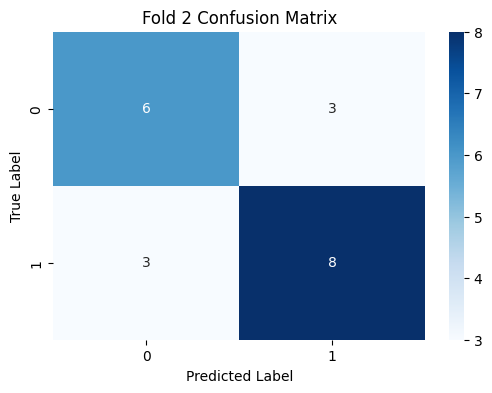

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.73      0.73      0.73        11

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



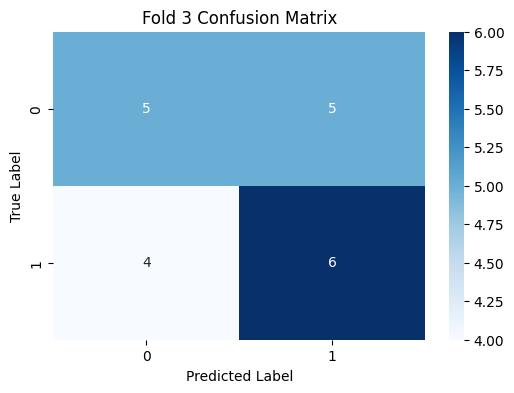

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



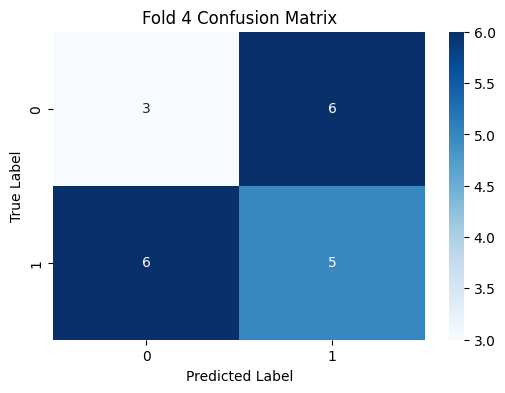

Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.45      0.45      0.45        11

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



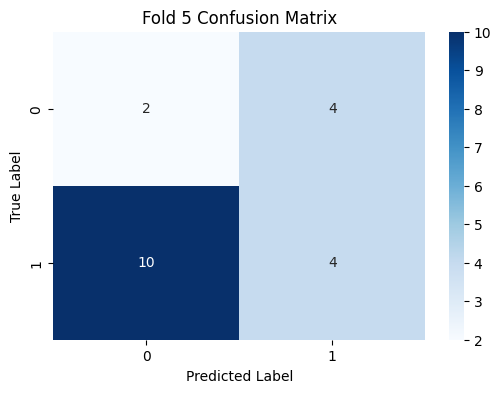

Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         6
           1       0.50      0.29      0.36        14

    accuracy                           0.30        20
   macro avg       0.33      0.31      0.29        20
weighted avg       0.40      0.30      0.32        20



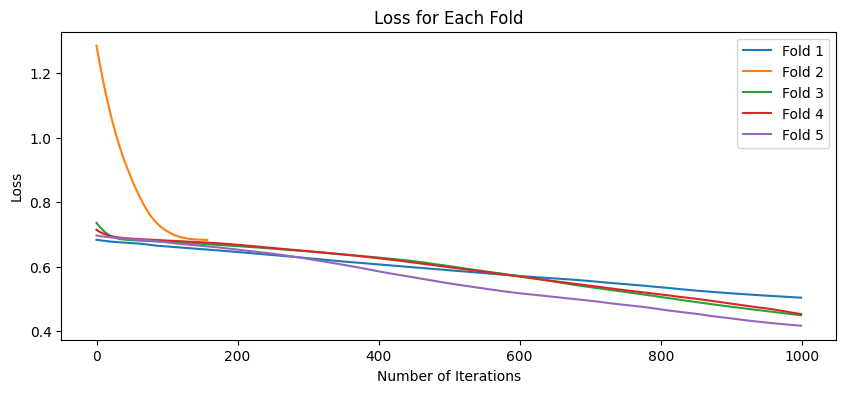

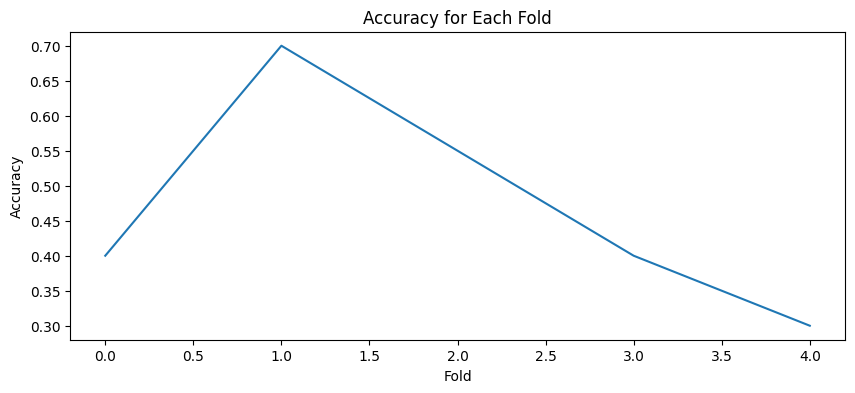

Average Accuracy: 0.47
Standard Deviation: 0.14


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, classification_report

# Generate some sample data
X = np.random.rand(100, 5)  # 100 samples with 5 features
y = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Store the accuracy and loss for each fold
fold_accuracies = []
fold_losses = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the MLP classifier on the training data
    mlp.fit(X_train, y_train)

    # Evaluate the model on the test data
    fold_accuracy = mlp.score(X_test, y_test)
    fold_accuracies.append(fold_accuracy)

    fold_loss = mlp.loss_curve_
    fold_losses.append(fold_loss)

    # Predict the labels for the test data
    y_pred = mlp.predict(X_test)

    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Fold {fold} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Compute and display the classification report
    report = classification_report(y_test, y_pred)
    print(f"Fold {fold} Classification Report:")
    print(report)

# Plot the loss and accuracy for each fold
plt.figure(figsize=(10, 4))
for fold_loss in fold_losses:
    plt.plot(fold_loss)
plt.title("Loss for Each Fold")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.legend(["Fold {}".format(i+1) for i in range(k)])
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(fold_accuracies)
plt.title("Accuracy for Each Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

# Compute and display the average accuracy and standard deviation
avg_accuracy = np.mean(fold_accuracies)
std_dev = np.std(fold_accuracies)
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


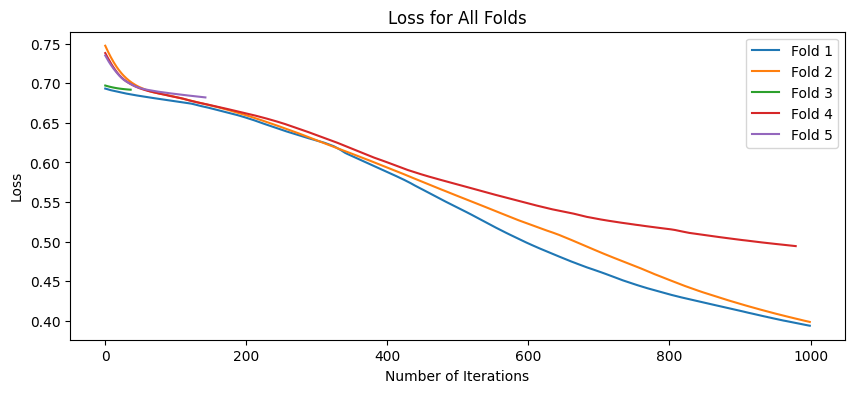

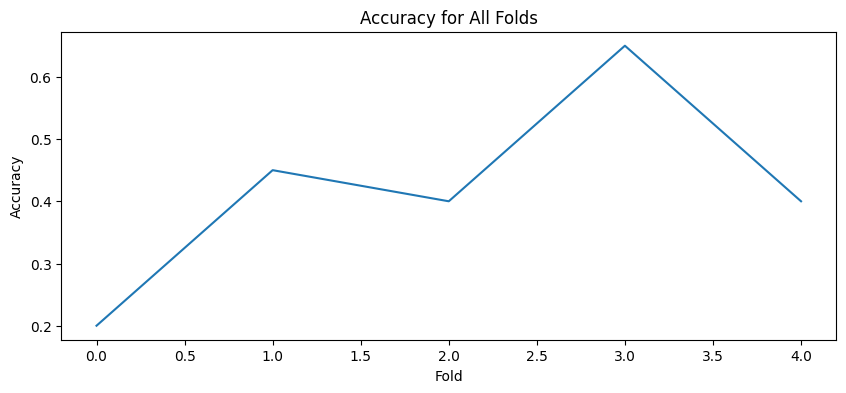

Average Accuracy: 0.42
Standard Deviation: 0.14


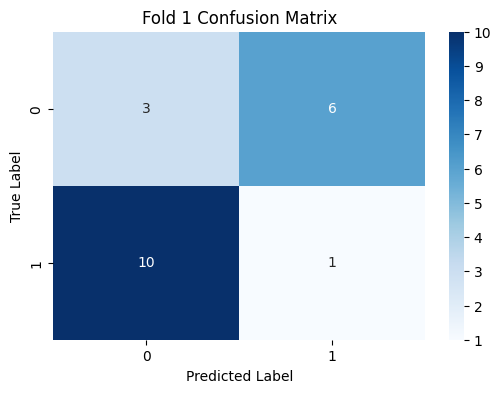

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.33      0.27         9
           1       0.14      0.09      0.11        11

    accuracy                           0.20        20
   macro avg       0.19      0.21      0.19        20
weighted avg       0.18      0.20      0.18        20



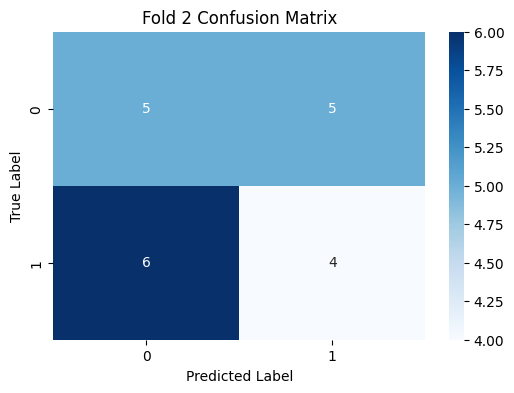

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



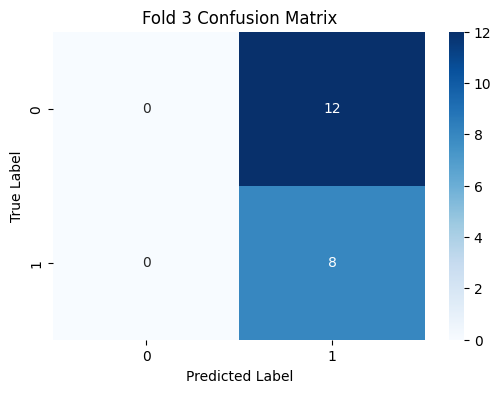

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



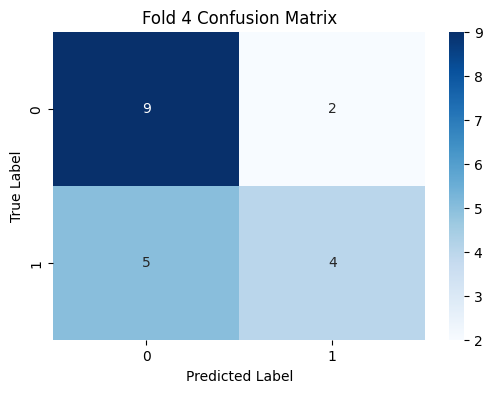

Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20



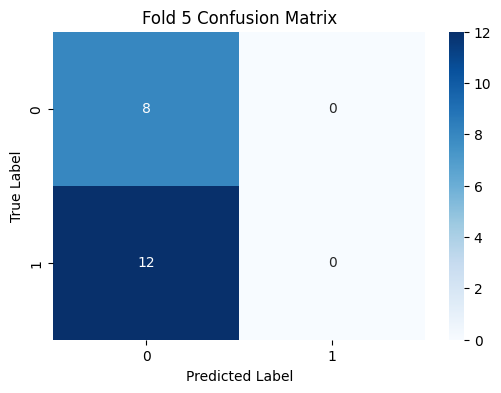

Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       0.00      0.00      0.00        12

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, classification_report

# Generate some sample data
X = np.random.rand(100, 5)  # 100 samples with 5 features
y = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Store the accuracy and loss for all folds
all_accuracies = []
all_losses = []
all_cm = []
all_reports = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the MLP classifier on the training data
    mlp.fit(X_train, y_train)

    # Evaluate the model on the test data
    fold_accuracy = mlp.score(X_test, y_test)
    all_accuracies.append(fold_accuracy)

    fold_loss = mlp.loss_curve_
    all_losses.append(fold_loss)

    # Predict the labels for the test data
    y_pred = mlp.predict(X_test)

    # Compute and store the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    all_cm.append(cm)

    # Compute and store the classification report
    report = classification_report(y_test, y_pred)
    all_reports.append(report)

# Plot the loss for all folds
plt.figure(figsize=(10, 4))
for fold_loss in all_losses:
    plt.plot(fold_loss)
plt.title("Loss for All Folds")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.legend(["Fold {}".format(i+1) for i in range(k)])
plt.show()

# Plot the accuracy for all folds
plt.figure(figsize=(10, 4))
plt.plot(all_accuracies)
plt.title("Accuracy for All Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

# Compute and display the average accuracy and standard deviation
avg_accuracy = np.mean(all_accuracies)
std_dev = np.std(all_accuracies)
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Display the confusion matrix and classification report for each fold
for fold in range(k):
    # Display confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(all_cm[fold], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Fold {fold+1} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Display classification report
    print(f"Fold {fold+1} Classification Report:")
    print(all_reports[fold])
